# Install libraries

In [35]:
!pip install bioservices
from IPython.display import clear_output
clear_output()

In [36]:
import numpy as np
import pandas as pd
from time import time

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

In [37]:
import math
from pathlib import Path
from zipfile import ZipFile
from tempfile import TemporaryDirectory

In [38]:
!pip install rdkit

In [9]:
from rdkit.Chem import PandasTools

# Display the Dataframe

In [39]:
# Load the CSV file into a DataFrame
import pandas as pd
bioactsDF_target = pd.read_csv('bioactsDF_target.csv')

# Display the first few rows of the DataFrame to confirm loading
bioactsDF_target.head()

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,2044963,[],CHEMBL922784,Inhibition of BRCA1 assessed as BRCT-BACH1 int...,B,NaN,NaN,BAO_0000192,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,NaN,NaN,Ki,uM,UO_0000065,NaN,38.0
1,NaN,NaN,2044963,[],CHEMBL922784,Inhibition of BRCA1 assessed as BRCT-BACH1 int...,B,NaN,NaN,BAO_0000192,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,NaN,NaN,Ki,uM,UO_0000065,NaN,38.0
2,NaN,NaN,2044964,[],CHEMBL922784,Inhibition of BRCA1 assessed as BRCT-BACH1 int...,B,NaN,NaN,BAO_0000192,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,NaN,NaN,Ki,uM,UO_0000065,NaN,30.0
3,NaN,NaN,2044965,[],CHEMBL922784,Inhibition of BRCA1 assessed as BRCT-BACH1 int...,B,NaN,NaN,BAO_0000192,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,NaN,NaN,Ki,uM,UO_0000065,NaN,39.0
4,NaN,Inconclusive,3658790,[],CHEMBL1613817,PUBCHEM_BIOASSAY: qHTS Assay for Inhibitors of...,F,NaN,NaN,BAO_0000186,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,NaN,NaN,Potency,um,UO_0000065,NaN,10.0


# Filter the Dataframe

## Filter the dataframe to only contain compounds with IC50

In [40]:
import pandas as pd

# Filter the DataFrame to keep only rows with "IC50" in the "type" column
bioactsDF_std_type = bioactsDF_target[bioactsDF_target['standard_type'].isin(['IC50'])]

print(bioactsDF_std_type.head(2))

     action_type activity_comment  activity_id activity_properties  \
325          NaN              NaN      6222842                  []   
326          NaN              NaN      6222843                  []   

    assay_chembl_id                                  assay_description  \
325   CHEMBL1785941  Inhibition of BRCA1 by fluorescence polarizati...   
326   CHEMBL1785941  Inhibition of BRCA1 by fluorescence polarizati...   

    assay_type  assay_variant_accession  assay_variant_mutation bao_endpoint  \
325          B                      NaN                     NaN  BAO_0000190   
326          B                      NaN                     NaN  BAO_0000190   

     ... target_organism                             target_pref_name  \
325  ...    Homo sapiens  Breast cancer type 1 susceptibility protein   
326  ...    Homo sapiens  Breast cancer type 1 susceptibility protein   

    target_tax_id text_value toid  type units    uo_units upper_value  value  
325          9606        N

In [41]:
bioactsDF_std_type.units.shape

(19,)

In [42]:
bioactsDF_std_type.head(2)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
325,NaN,NaN,6222842,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,4.6
326,NaN,NaN,6222843,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Breast cancer type 1 susceptibility protein,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,250.0


In [43]:
# Save DataFrame as CSV file
bioactsDF_std_type.to_csv('bioactsDF_std_type.csv', index=False)

# For Google Colab, to download the file:
from google.colab import files

# Download the file from Colab
files.download('bioactsDF_std_type.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Descriptor Calculation

In [35]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors

# Load the CSV file
df = pd.read_csv('bioactsDF_std_type.csv')

# Define a function to calculate molecular descriptors
def calculate_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return pd.Series([None]*6)  # In case of invalid SMILES

    mol_weight = Descriptors.MolWt(mol)
    logP = Descriptors.MolLogP(mol)
    h_bond_donors = Descriptors.NumHDonors(mol)
    h_bond_acceptors = Descriptors.NumHAcceptors(mol)
    tpsa = Descriptors.TPSA(mol)  # Topological Polar Surface Area
    num_rot_bonds = Descriptors.NumRotatableBonds(mol)

    return pd.Series([mol_weight, logP, h_bond_donors, h_bond_acceptors, tpsa, num_rot_bonds])

# Apply the function to each row in the 'canonical_smiles' column
df[['Molecular_Weight', 'LogP', 'H_Bond_Donors', 'H_Bond_Acceptors', 'TPSA', 'Num_Rotatable_Bonds']] = df['canonical_smiles'].apply(calculate_descriptors)

# Save the new DataFrame with descriptors to a CSV file
df.to_csv('molecules_with_descriptors.csv', index=False)

print("Descriptors calculated and saved to molecules_with_descriptors.csv")

Descriptors calculated and saved to molecules_with_descriptors.csv


# Convert IC50 to pIC50

In [38]:
import pandas as pd
import numpy as np

# Load the dataset
df_filtered = pd.read_csv('molecules_with_descriptors.csv')

# Check if 'value' column contains IC50 values in micromolar (µM)
# If needed, convert from µM to M (dividing by 1e6) before calculating pIC50
df_filtered['value'] = df_filtered['value'] / 1e6

# Calculate pIC50
# Adding a small constant (1e-9) to avoid log(0) issues
df_filtered['pIC50'] = -np.log10(df_filtered['value'].clip(lower=1e-9))

# Save the dataset with pIC50 values
df_filtered.to_csv('filtered_molecules_with_descriptors_with_pIC50.csv', index=False)

print("Converted IC50 to pIC50 and saved to filtered_molecules_with_descriptors_with_pIC50.csv")


Converted IC50 to pIC50 and saved to filtered_molecules_with_descriptors_with_pIC50.csv


In [42]:
df_filtered.head(2)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,uo_units,upper_value,value,Molecular_Weight,LogP,H_Bond_Donors,H_Bond_Acceptors,TPSA,Num_Rotatable_Bonds,pIC50
0,NaN,NaN,6222842,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,NaN,NaN,BAO_0000190,...,UO_0000065,NaN,0.000005,571.524,-2.3302,7.0,8.0,237.69,13.0,5.337242
1,NaN,NaN,6222843,[],CHEMBL1785941,Inhibition of BRCA1 by fluorescence polarizati...,B,NaN,NaN,BAO_0000190,...,UO_0000065,NaN,0.000250,533.582,-1.5747,6.0,7.0,208.23,13.0,3.602060


## Visualization of pIC50 values

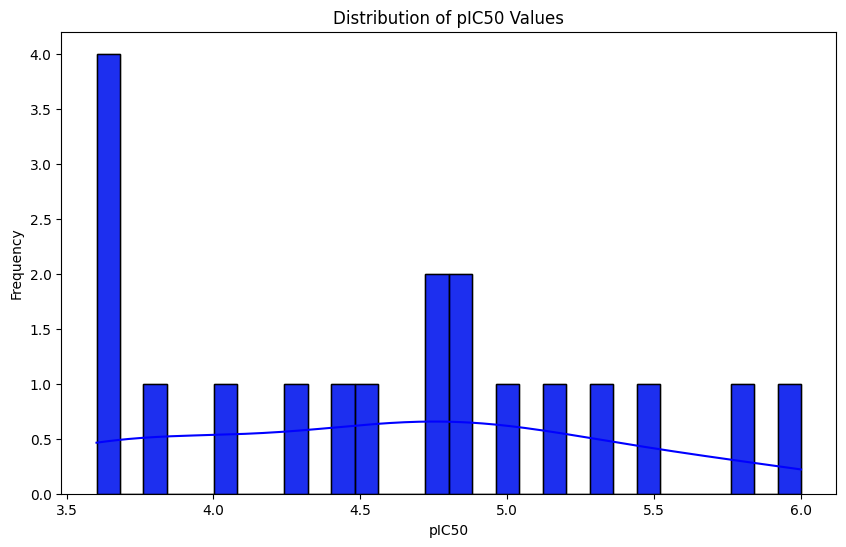

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df_filtered = pd.read_csv('filtered_molecules_with_descriptors_with_pIC50.csv')

# Plot pIC50 values
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot a histogram
plt.hist(df_filtered['pIC50'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('pIC50')
plt.ylabel('Frequency')
plt.title('Distribution of pIC50 Values')

# Alternatively, use seaborn to create a more advanced plot
sns.histplot(df_filtered['pIC50'].dropna(), bins=30, kde=True, color='blue', alpha=0.7)

# Show the plot
plt.show()
